# Project - EDA with Pandas Using the Ames Housing Data

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free-form project, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains housing values in the suburbs of Ames.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file ``ames_train.csv``) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data.
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions
Look in ``data_description.txt`` for a full description of all variables.

A preview of some of the columns:

**MSZoning**: Identifies the general zoning classification of the sale.
		
       A	 Agriculture
       C	 Commercial
       FV	Floating Village Residential
       I	 Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

**OverallCond**: Rates the overall condition of the house

       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor

**KitchenQual**: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

**YrSold**: Year Sold (YYYY)

**SalePrice**: Sale price of the house in dollars

In [1]:
# Let's get started importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Loading the data
path = 'ames_train.csv'
df = pd.read_csv(path)

In [4]:
# Investigate the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [8]:
# Explore the columns with null values & sort them in descending order
null_list = list(df.isnull().sum().sort_values(ascending=False)[:19].index)
null_list

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'LotFrontage',
 'GarageCond',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrArea',
 'MasVnrType',
 'Electrical']

In [10]:
# Get stats info for numerical columns with null values
df[null_list].describe()

,LotFrontage,GarageYrBlt,MasVnrArea
count,1201.000000,1379.000000,1452.000000
mean,70.049958,1978.506164,103.685262
std,24.284752,24.689725,181.066207
min,21.000000,1900.000000,0.000000
25%,59.000000,1961.000000,0.000000
50%,69.000000,1980.000000,0.000000
75%,80.000000,2002.000000,166.000000
max,313.000000,2010.000000,1600.000000


In [12]:
# Get the modes of columns with null values
df[null_list].mode()

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageCond,GarageType,GarageYrBlt,GarageFinish,GarageQual,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,MasVnrArea,MasVnrType,Electrical
0,Gd,Shed,Grvl,MnPrv,Gd,60.0,TA,Attchd,2005.0,Unf,TA,No,Unf,Unf,TA,TA,0.0,None,SBrkr


In [15]:
# Investigating the mean, median, standard deviation, and count per value for all categorical columns
categorical_cols = list(df.select_dtypes(include=['object']).columns)

for col in categorical_cols:
    val_count = df[col].value_counts()
    p_mean = df.groupby(col)['SalePrice'].mean()
    p_median = df.groupby(col)['SalePrice'].median()
    p_std = df.groupby(col)['SalePrice'].std()
    col_data = pd.concat([p_mean, p_median, p_std, val_count], axis=1)
    print(col)
    print(col_data)
    print("\n")

MSZoning
             SalePrice  SalePrice     SalePrice  MSZoning
C (all)   74528.000000      74700  33791.092031        10
FV       214014.061538     205950  52369.662067        65
RH       131558.375000     136500  35714.118435        16
RL       191004.994787     174000  80766.341319      1151
RM       126316.830275     120500  48521.689833       218


Street
          SalePrice  SalePrice     SalePrice  Street
Grvl  130190.500000     114250  65446.253991       6
Pave  181130.538514     163000  79446.597317    1454


Alley
           SalePrice  SalePrice     SalePrice  Alley
Alley                                               
Grvl   122219.080000     119500  34780.780734     50
Pave   168000.585366     172500  38370.375243     41


LotShape
         SalePrice  SalePrice     SalePrice  LotShape
IR1  206101.665289     189000  85858.489559       484
IR2  239833.365854     221000  99669.427362        41
IR3  216036.500000     203570  82540.334855        10
Reg  164754.818378     14600

BsmtExposure
        SalePrice  SalePrice      SalePrice  BsmtExposure
Av  206643.420814     185850   88655.504849           221
Gd  257689.805970     226975  118923.672583           134
Mn  192789.657895     182450   77335.442652           114
No  165652.295908     154000   60695.724915           953


BsmtFinType1
         SalePrice  SalePrice     SalePrice  BsmtFinType1
ALQ  161573.068182     149250  50821.277231           220
BLQ  149493.655405     139100  47327.292126           148
GLQ  235413.720096     213750  93215.613258           418
LwQ  151852.702703     139000  50796.987083            74
Rec  146889.248120     142000  45190.118879           133
Unf  170670.576744     161750  72577.080129           430


BsmtFinType2
         SalePrice  SalePrice      SalePrice  BsmtFinType2
ALQ  209942.105263     174900  104764.743411            19
BLQ  151101.000000     143000   41611.305388            33
GLQ  180982.142857     203125   64573.040359            14
LwQ  164364.130435     15

In [17]:
# Explore mean sales price per neighborhood
# --> MeadowV has the lowest average sales price (98576.470588)
# and NoRidge has the highest average sales price (335295.317073)
df.groupby('Neighborhood', as_index=True)['SalePrice'].mean()

Neighborhood
Blmngtn    194870.882353
Blueste    137500.000000
BrDale     104493.750000
BrkSide    124834.051724
ClearCr    212565.428571
CollgCr    197965.773333
Crawfor    210624.725490
Edwards    128219.700000
Gilbert    192854.506329
IDOTRR     100123.783784
MeadowV     98576.470588
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
NWAmes     189050.068493
NoRidge    335295.317073
NridgHt    316270.623377
OldTown    128225.300885
SWISU      142591.360000
Sawyer     136793.135135
SawyerW    186555.796610
Somerst    225379.837209
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Name: SalePrice, dtype: float64

In [19]:
# get the average price per sqft for each neighborhood
# --> IDOTRR has the lowest average rate
# and StoneBr has the highest average rate
df['TotalLivSF'] = df.GrLivArea + df.TotalBsmtSF - df.LowQualFinSF
df.groupby('Neighborhood', as_index=True)['SalePrice'].mean() / df.groupby('Neighborhood', as_index=True)['TotalLivSF'].mean()

Neighborhood
Blmngtn    70.801560
Blueste    67.700640
BrDale     60.503746
BrkSide    63.704292
ClearCr    70.917618
CollgCr    75.041421
Crawfor    74.769681
Edwards    57.244515
Gilbert    76.844541
IDOTRR     53.852684
MeadowV    57.569824
Mitchel    65.414034
NAmes      62.495892
NPkVill    65.273189
NWAmes     65.605563
NoRidge    83.769175
NridgHt    89.880781
OldTown    56.503438
SWISU      56.219783
Sawyer     62.675327
SawyerW    71.135475
Somerst    82.650358
StoneBr    91.267401
Timber     78.046283
Veenker    83.460439
dtype: float64

In [21]:
# Convert df.corr() into a dictionary and identify 10 variables with highest correlations with SalePrice
corr = sorted(dict(df.corr())['SalePrice'].items(), key=lambda x: x[1], reverse=True)[1:10]
hi_correlated_vars = [var[0] for var in corr]
hi_correlated_vars.append('SalePrice')
corr

[('OverallQual', 0.7909816005838047),
 ('TotalLivSF', 0.7822600527979842),
 ('GrLivArea', 0.7086244776126511),
 ('GarageCars', 0.640409197258349),
 ('GarageArea', 0.6234314389183598),
 ('TotalBsmtSF', 0.6135805515591944),
 ('1stFlrSF', 0.6058521846919166),
 ('FullBath', 0.5606637627484452),
 ('TotRmsAbvGrd', 0.5337231555820238)]

array([[<AxesSubplot:xlabel='OverallQual', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='TotalLivSF', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='TotalBsmtSF', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='1stFlrSF', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='FullBath', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>],
       [<AxesSubplot:xlabel='OverallQual', ylabel='TotalLivSF'>,
        <AxesSubplot:xlabel='TotalLivSF', ylabel='TotalLivSF'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='TotalLivSF'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='TotalLivSF'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='TotalLivSF'>,
        <AxesSubplot:xlabel='To

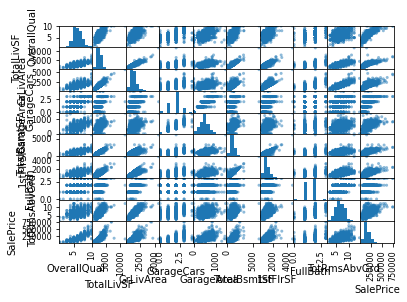

In [22]:
# Investigating Distributions using scatter_matrix
pd.plotting.scatter_matrix(df[hi_correlated_vars])

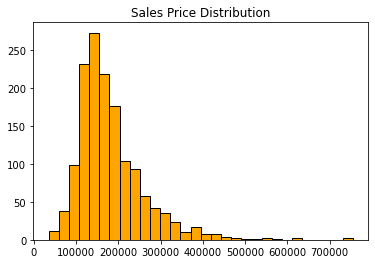

In [26]:
# Create a plot that shows the SalesPrice Distribution
plt.hist(df.SalePrice, color='orange', edgecolor='black', bins=30)
plt.title('Sales Price Distribution')
plt.show()

Text(0.5, 1.0, 'Sales Price vs. Lot Area')

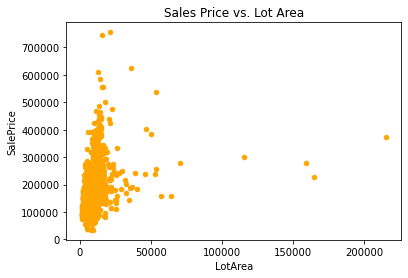

In [29]:
# Create a plot that shows the LotArea Distribution
ax = df.plot.scatter('LotArea', 'SalePrice', color='orange')
ax.set_title('Sales Price vs. Lot Area')

Text(0.5, 1.0, 'Average Sales Price per Overall Condition Rating')

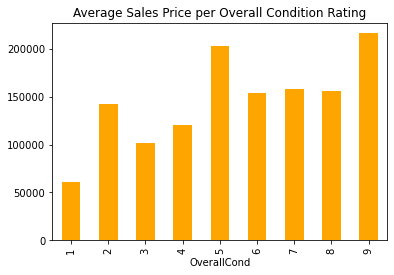

In [31]:
# Create a plot that shows the Distribution of the overall house condition
# Get the average selling price for each overall condition rating
overallcond_mean = df.groupby('OverallCond', as_index=True)['SalePrice'].mean()
ax = overallcond_mean.plot.bar(color='orange')
ax.set_title('Average Sales Price per Overall Condition Rating')

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<AxesSubplot:>

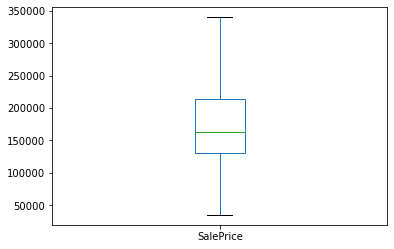

In [34]:
# Create a Box Plot for SalePrice (removing outliers)
print(df.SalePrice.describe())
df.SalePrice.plot.box(showfliers=False)

In [44]:
# Perform an Exploration of home values by age
df['AgeSold'] = df.YrSold - df.YearBuilt

Text(0, 0.5, 'Average Sales Price')

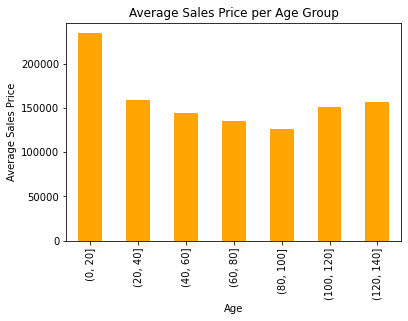

In [50]:
age_mean = df.groupby(pd.cut(df["AgeSold"], np.arange(0, 160, 20))).SalePrice.mean()
ax = age_mean.plot.bar(color='orange')
ax.set_title('Average Sales Price per Age Group')
ax.set_xlabel('Age')
ax.set_ylabel('Average Sales Price')

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!